In [346]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib


Reading the datasets

In [347]:
df_2015 = pd.read_csv('../Datasets/2015.csv')
df_2016 = pd.read_csv('../Datasets/2016.csv')
df_2017 = pd.read_csv('../Datasets/2017.csv')
df_2018 = pd.read_csv('../Datasets/2018.csv')
df_2019 = pd.read_csv('../Datasets/2019.csv')


Infomation 2015

In [348]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [349]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Infomation 2016

In [350]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [351]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Infomation 2017

In [352]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [353]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Infomation 2018

In [354]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [355]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Infomation 2019

In [356]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [357]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Analyzing and Standarizing the data

Se puede notar que en los anteriores datasets cada uno presenta una variedad de métricas que se usan para evaluar la felicidad y el bienestar en diferentes países. Estos incluyen factores económicos como el PIB per cápita, que refleja el nivel económico de un país; apoyos sociales, que indican el nivel de apoyo social percibido por los ciudadanos; expectativas de vida saludable, que muestran la calidad de la salud en la población; y percepciones de corrupción, que reflejan cómo la corrupción afecta la percepción del bienestar.

In [358]:
def ren_col_1516(df):
    column_mappings = {
        'Happiness Score': 'happiness_score',
        'Happiness Rank': 'happiness_rank',
        'Economy (GDP per Capita)': 'gdp_per_capita',
        'Family': 'social_support',
        'Health (Life Expectancy)': 'healthy_life_expectancy',
        'Trust (Government Corruption)': 'trust_government_corruption'}
    df.rename(columns=column_mappings, inplace=True)
    df.columns = [col.lower() for col in df.columns]
    return df[['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']]

In [359]:
def ren_col_17(df):
    column_mappings = {
        'Happiness.Score': 'happiness_score',
        'Happiness.Rank': 'happiness_rank',
        'Economy..GDP.per.Capita.': 'gdp_per_capita',
        'Family': 'social_support',
        'Health..Life.Expectancy.': 'healthy_life_expectancy',
        'Trust..Government.Corruption.': 'trust_government_corruption'}
    df.rename(columns=column_mappings, inplace=True)
    df.columns = [col.lower() for col in df.columns]
    return df[['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']]

In [360]:
def ren_col_1819(df):
    column_mappings = {
        'Country or region': 'country',
        'Overall rank': 'happiness_rank',
        'Score': 'happiness_score',
        'GDP per capita': 'gdp_per_capita',
        'Social support': 'social_support',
        'Freedom to make life choices': 'freedom',
        'Healthy life expectancy': 'healthy_life_expectancy',
        'Perceptions of corruption': 'trust_government_corruption',
        'Generosity': 'generosity'}
    df.rename(columns=column_mappings, inplace=True)
    df.columns = [col.lower() for col in df.columns]
    return df[['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']]

In [361]:
new_2015 = ren_col_1516(df_2015)
new_2016 = ren_col_1516(df_2016)
new_2017 = ren_col_17(df_2017)
new_2018 = ren_col_1819(df_2018)
new_2019 = ren_col_1819(df_2019)
dfs = [new_2015, new_2016, new_2017, new_2018, new_2019]

Verify si las columnas estan correctamente ordenadas en cada DataFrame para realizar el merge correctamente.

In [362]:
def column_names(df):
    for i, df in enumerate(df):
        print(f"DataFrame {i}: {df.columns.tolist()}")

column_names(dfs)


DataFrame 0: ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']
DataFrame 1: ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']
DataFrame 2: ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']
DataFrame 3: ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']
DataFrame 4: ['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita', 'social_support', 'freedom', 'healthy_life_expectancy', 'generosity', 'trust_government_corruption']


In [363]:
def concat_df(df_list):
    columns_set = {tuple(df.columns) for df in df_list}
    if len(columns_set) != 1:
        raise ValueError("All DataFrames must have the same columns to concatenate. Please check the column names.")
    concate_df = pd.concat(df_list, ignore_index=True)
    return concate_df

new_happy_world = concat_df(dfs)
new_happy_world.head()

,country,happiness_rank,happiness_score,gdp_per_capita,social_support,freedom,healthy_life_expectancy,generosity,trust_government_corruption
0,Switzerland,1,7.587,1.39651,1.34951,0.66557,0.94143,0.29678,0.41978
1,Iceland,2,7.561,1.30232,1.40223,0.62877,0.94784,0.43630,0.14145
2,Denmark,3,7.527,1.32548,1.36058,0.64938,0.87464,0.34139,0.48357
3,Norway,4,7.522,1.45900,1.33095,0.66973,0.88521,0.34699,0.36503
4,Canada,5,7.427,1.32629,1.32261,0.63297,0.90563,0.45811,0.32957


In [364]:
new_happy_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      782 non-null    object 
 1   happiness_rank               782 non-null    int64  
 2   happiness_score              782 non-null    float64
 3   gdp_per_capita               782 non-null    float64
 4   social_support               782 non-null    float64
 5   freedom                      782 non-null    float64
 6   healthy_life_expectancy      782 non-null    float64
 7   generosity                   782 non-null    float64
 8   trust_government_corruption  781 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


El DataFrame resultante de la concatenación de los años 2015 a 2019 quedo con 782 filas y 9 columnas. Todos los DataFrames involucrados tenían las mismas columnas, permitiendo una concatenación exitosa.

Nulls and Duplicates

In [365]:
new_happy_world.isna().sum()

country                        0
happiness_rank                 0
happiness_score                0
gdp_per_capita                 0
social_support                 0
freedom                        0
healthy_life_expectancy        0
generosity                     0
trust_government_corruption    1
dtype: int64

Solo hay un valor nulo en la columna "trust_government_corruption", lo que vamos hacer con esta es eliminar la fila.

In [366]:
new_happy_world.dropna(inplace=True)

In [367]:
new_happy_world.duplicated().sum()

0

No tenemos duplicados asi que continuamos...

Matrix de Correlación

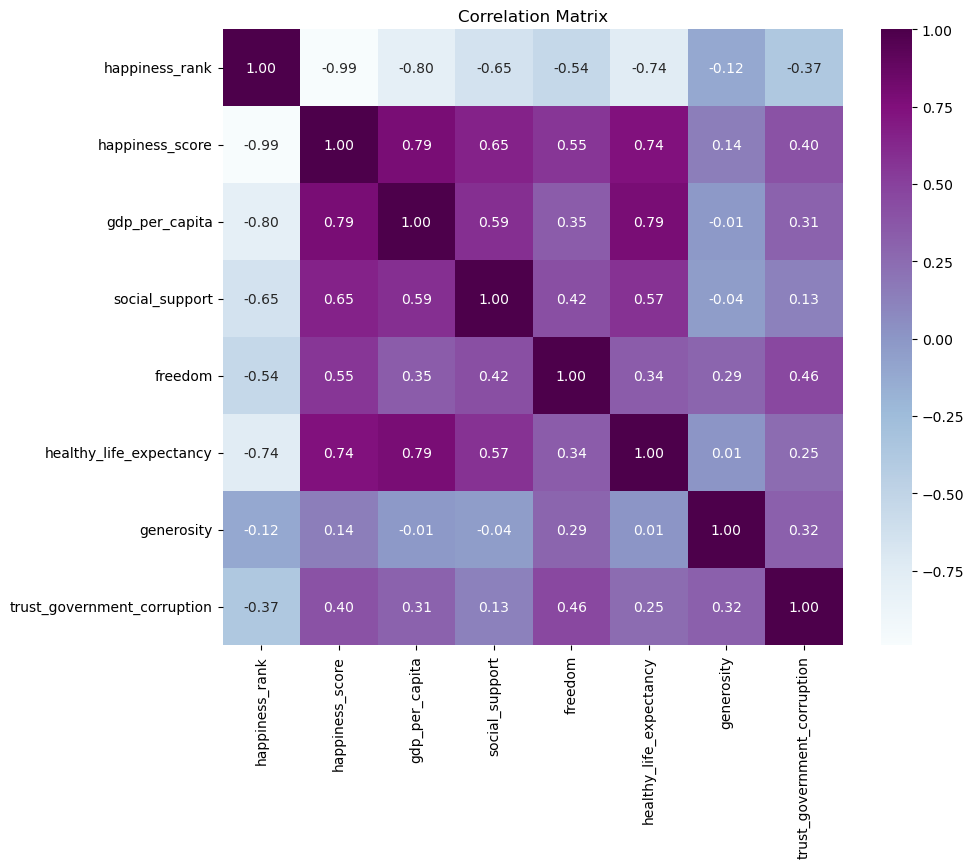

In [368]:
new_happy = new_happy_world.select_dtypes(include=[np.number])
correlation_matrix = new_happy.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu')
plt.show()


La matriz de correlación nos muestra que la felicidad de un país está fuertemente influenciada por su PIB per cápita, apoyo social y salud. Existe una correlación negativa casi perfecta entre el  'happiness_rank' y su 'happiness_score', indicando que a mejor puntuación, mejor es el rango, pero . 

Las variables de 'happiness_rank', 'generosity' y 'perceptions_of_corruption' tienen una influencia menor en la felicidad asi que las vamos a elimina para evistar sesgos en nuestro modelo.

In [369]:
colum_drop = ['happiness_rank','generosity','trust_government_corruption']
new_happy.drop(columns=colum_drop, inplace=True)

In [370]:
new_happy.head()

,happiness_score,gdp_per_capita,social_support,freedom,healthy_life_expectancy
0,7.587,1.39651,1.34951,0.66557,0.94143
1,7.561,1.30232,1.40223,0.62877,0.94784
2,7.527,1.32548,1.36058,0.64938,0.87464
3,7.522,1.45900,1.33095,0.66973,0.88521
4,7.427,1.32629,1.32261,0.63297,0.90563


Regression Model

In [371]:

X = new_happy.drop('happiness_score',axis= 1) 
y = new_happy['happiness_score'] 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((546, 4), (235, 4), (546,), (235,))


Training Model

In [372]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

Save the model

In [374]:
m_file = "../Model/RFR_Model.pkl"
joblib.dump(model, m_file)

['../Model/RFR_Model.pkl']